In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [2]:
## This code loads digits, but you'll have to rework it to fit into torch's data loader
res = 28
digits = []
for i in range(10):
    digits.append([])
    I = skimage.io.imread("Digits/{}.png".format(i))/255.0
    row = 0
    col = 0
    while row < I.shape[0]:
        col = 0
        while col < I.shape[1]:
            img = I[row:row+res, col:col+res]
            if np.sum(img) > 0:
                digits[i].append(img)
            col += res
        row += res
    print(len(digits[i]), "unique ", i, " digits")
    

5923 unique  0  digits
6742 unique  1  digits
5958 unique  2  digits
6131 unique  3  digits
5842 unique  4  digits
5421 unique  5  digits
5918 unique  6  digits
6265 unique  7  digits
5851 unique  8  digits
5949 unique  9  digits


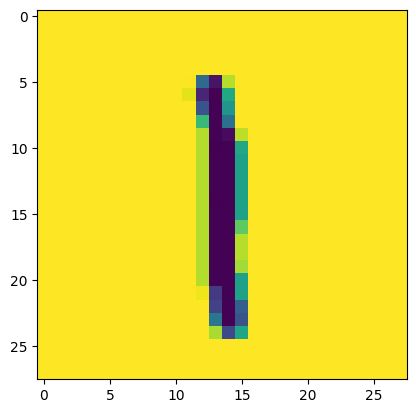

In [5]:
plt.imshow(digits[1][3])

In [60]:
class DigitsData(Dataset):
    def __init__(self, folderpath):
        """
        This code loads digits, but you'll have to rework it to fit into torch's data loader
        """
        res = 28
        digits = []
        for i in range(10):
            digits.append([])
            I = skimage.io.imread("{}/{}.png".format(folderpath, i))/255.0
            row = 0
            col = 0
            while row < I.shape[0]:
                col = 0
                while col < I.shape[1]:
                    img = I[row:row+res, col:col+res]
                    if np.sum(img) > 0:
                        digits[i].append(img)
                    col += res
                row += res
            #print(len(digits[i]), "unique ", i, " digits")
        self.digits = digits # sotre as instance variable

    
    def __len__(self):
        return sum([len(digit) for digit in self.digits])
    
    def __getitem__(self, i):
        ## TODO: Return x, y
        ## where x is a flattened digit as a torch tensor, and y is its ID
        y = 0
        while i - len(self.digits[y]) > 0:
            i -= len(self.digits[y])
            y += 1
        x = np.array(digits[y][i], dtype=np.float32)
        yk = np.zeros(10, dtype=np.float32)
        yk[y] = 1
        return torch.from_numpy(x).flatten(), torch.from_numpy(yk)
        

In [61]:
training = DigitsData("Digits")
testing = DigitsData("DigitsTest")

In [62]:
loader = DataLoader(training, batch_size=16, shuffle=True)
X, Y = next(iter(loader))

In [63]:
print(X.shape, Y.shape)

torch.Size([16, 784]) torch.Size([16, 10])


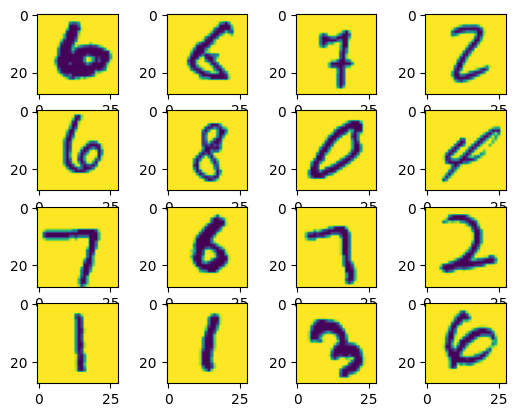

In [65]:
for k in range(X.shape[0]):
    plt.subplot(4,4, k+1)
    plt.imshow(torch.reshape(X[k, :], (28,28)))

# Testing to make sure it works

In [47]:
print(len(training))
print(len(testing))

60000
10000


Text(0.5, 1.0, 'tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])')

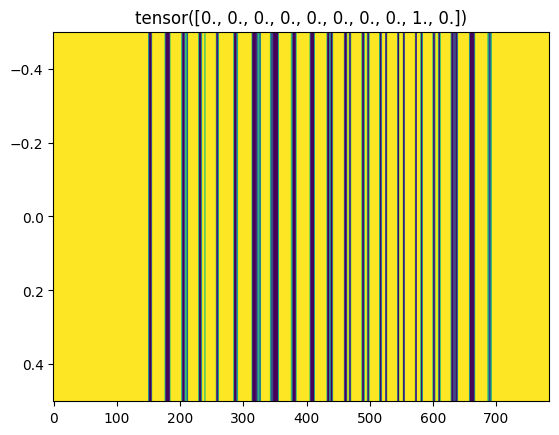

In [52]:
x, y = training[50000]
plt.imshow(x[None, :], aspect='auto')
plt.title("{}".format(y))